In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('./processed_dataset.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64


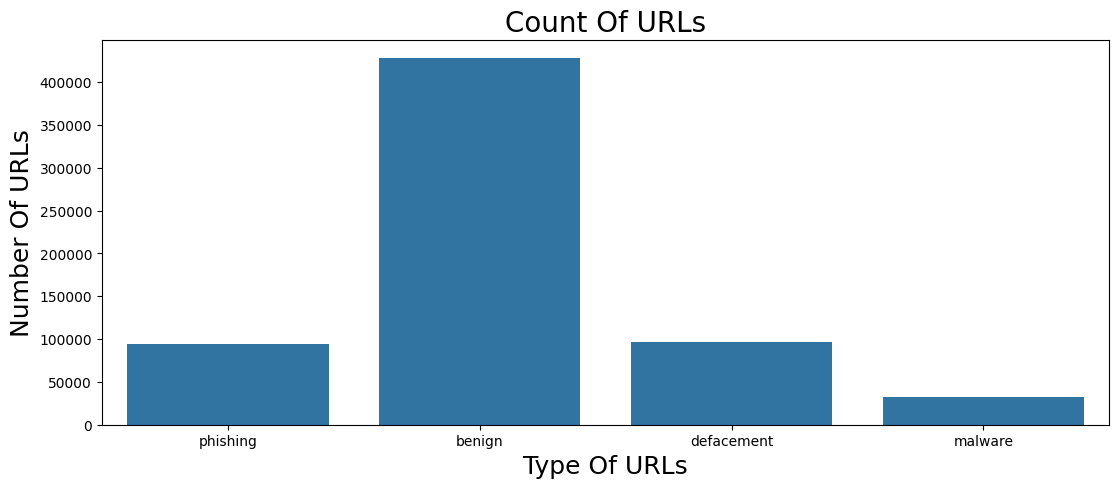

In [5]:
i=data['type'].value_counts()
print(i)

#Different Types of url is present in the dataset
plt.figure(figsize=(13,5))
sns.countplot(x='type',data=data)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.show()

In [4]:
data.head(10)

,url,type,Category,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,1,1,0,22,199,0,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,...,0,0,0,1,1,0,1,93,0,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,...,0,0,0,0,0,0,4,31,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,...,0,0,0,0,0,0,0,40,1,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,...,0,0,0,1,1,0,0,34,0,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,...,0,0,0,0,0,0,5,33,0,0


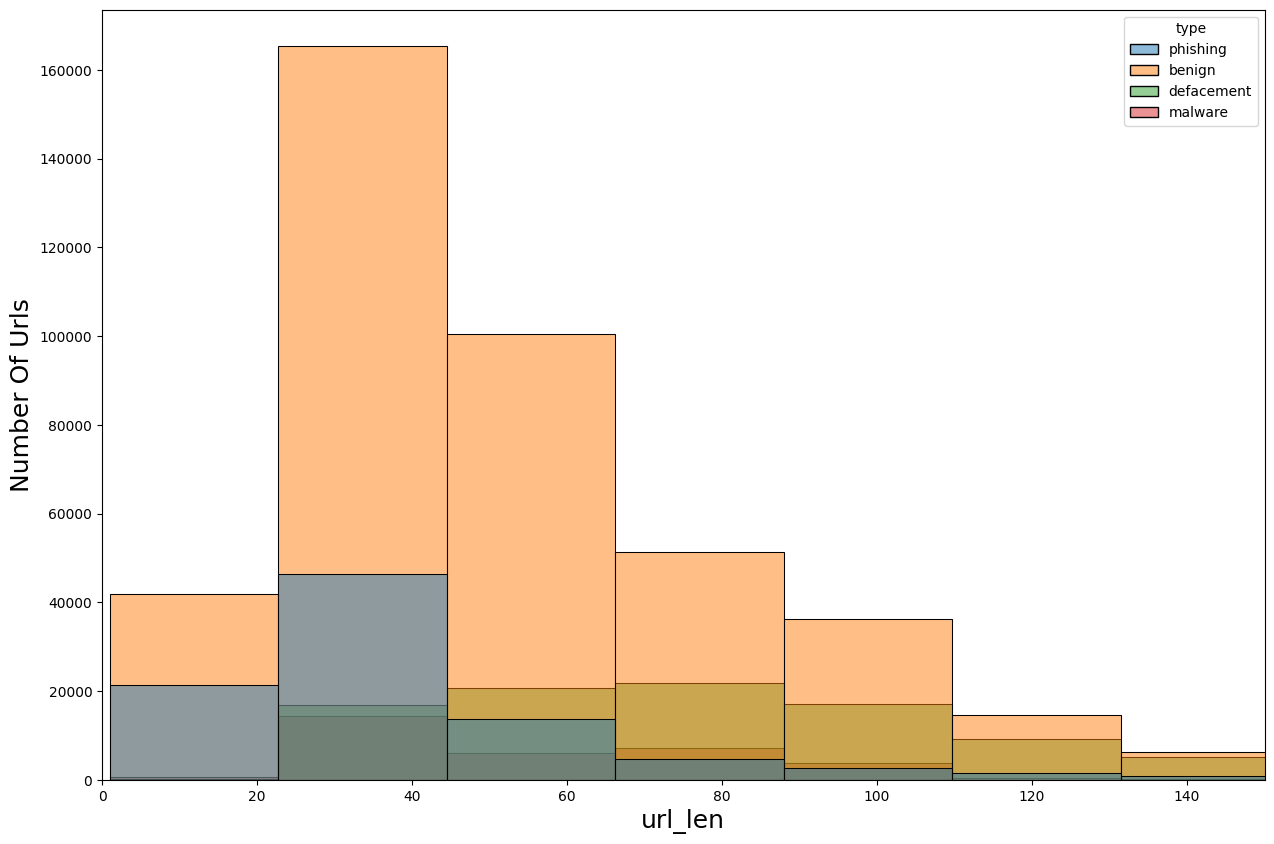

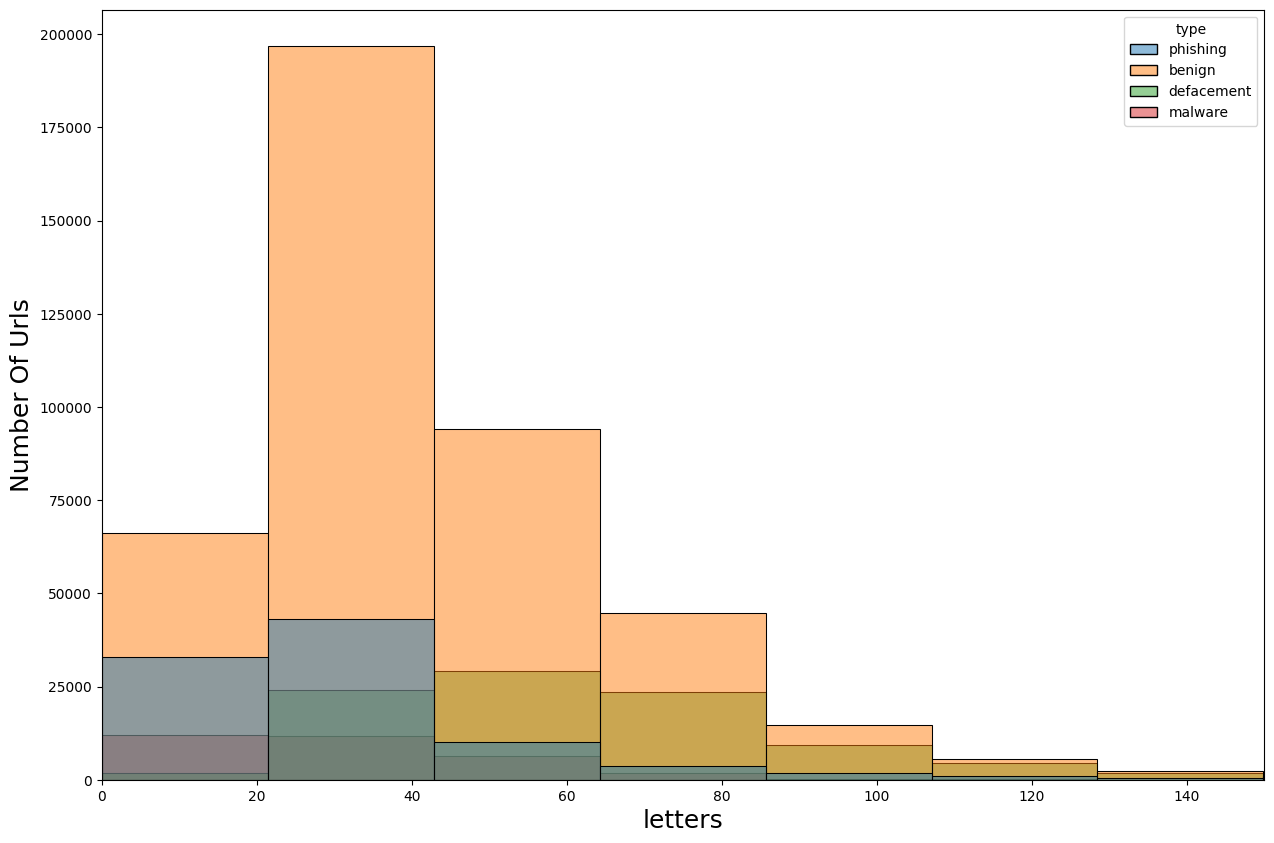

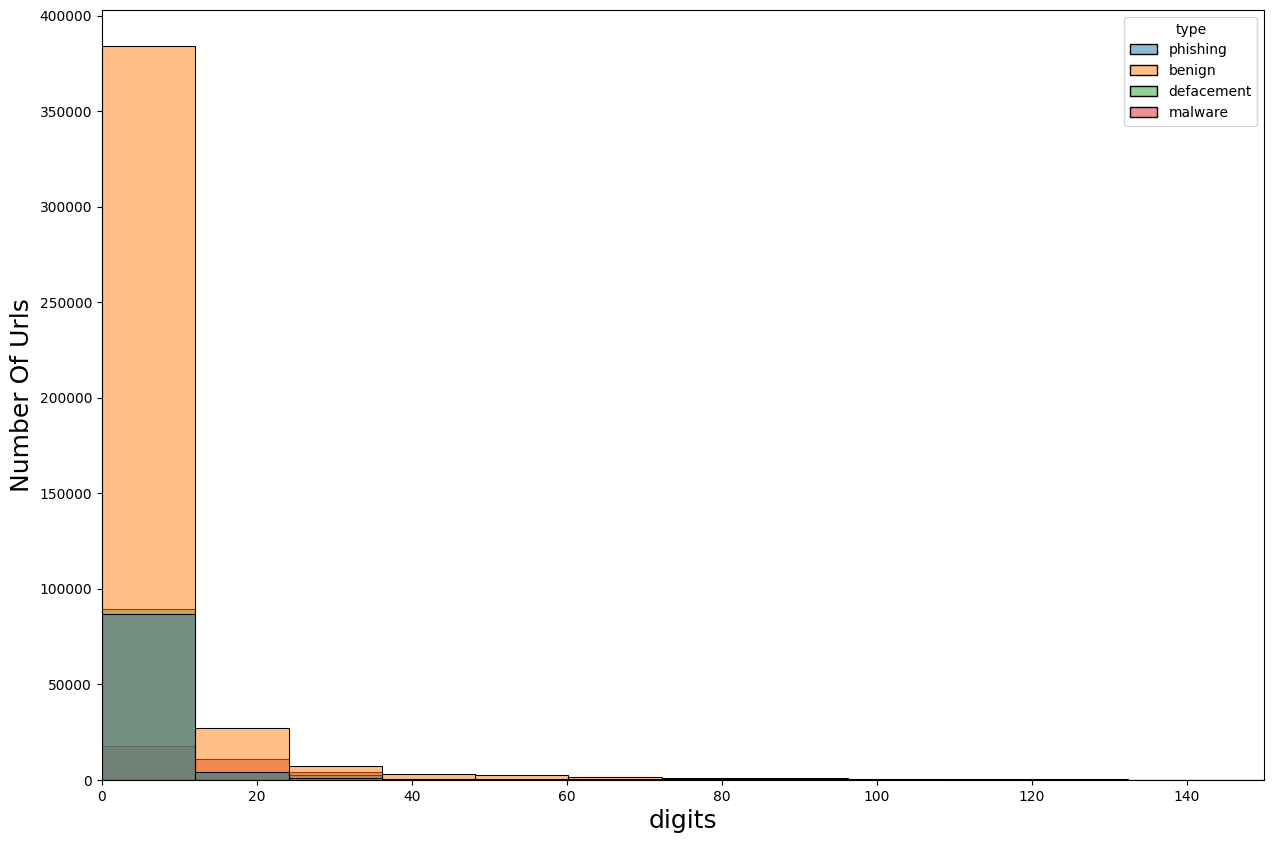

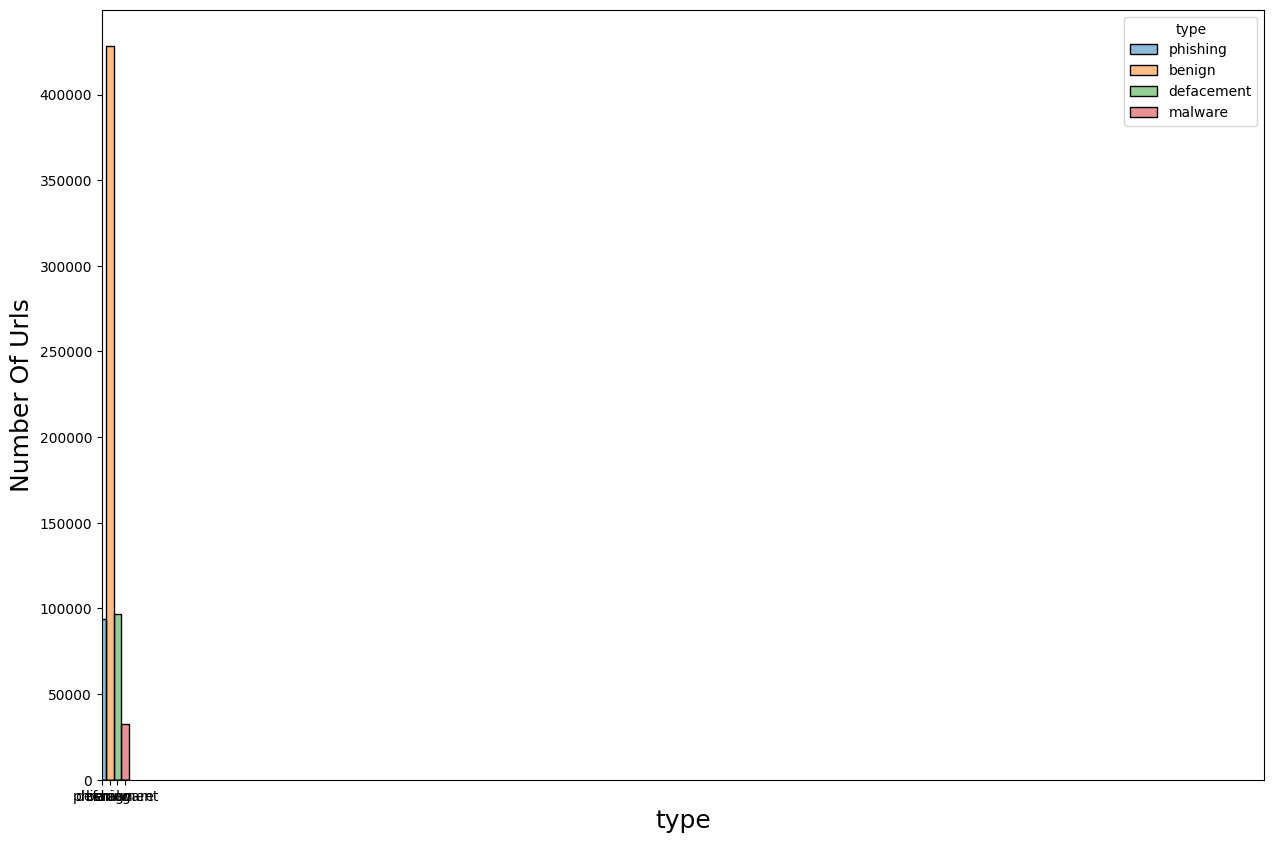

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10

hist_features = ["url_len","letters","digits","type"]

for i in hist_features:
    sns.histplot(data=data,x=i,bins=100,hue='type')
    plt.xlabel(i,fontsize=18)
    plt.ylabel("Number Of Urls",fontsize=18)
    plt.xlim(0,150)
    plt.show()

## Model Training

In [6]:
data.drop(['url','type'],axis=1,inplace=True)

In [7]:
data.head()

,Category,url_len,domain,@,?,-,=,.,#,%,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,2,16,br-icloud.com.br,0,0,1,0,2,0,0,...,0,0,0,0,0,0,0,13,0,0
1,0,35,mp3raid.com,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,29,0,0
2,0,31,bopsecrets.org,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,25,0,0
3,1,84,garage-pirenne.be,0,1,1,4,2,0,0,...,0,0,0,1,1,0,7,60,0,0
4,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,...,0,0,0,1,1,0,22,199,0,0


In [8]:
x=data.drop(['domain', 'https'], axis=1)

y=data['Category']

In [15]:
# x.head()
# y.head()

y.value_counts(normalize=True)

Category
0    0.657415
1    0.148124
2    0.144521
3    0.049939
Name: proportion, dtype: float64

## Oversampling imabalanced Dataset

In [22]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Use fit_resample instead of fit_sample
x_sample, y_sample = smote.fit_resample(x, y.values.ravel())

# Convert to DataFrames
# x_sample = pd.DataFrame(x_sample, columns=x.columns)  # Keep original column names
# y_sample = pd.DataFrame(y_sample, columns=['Category'])

# Verify the resampling
print("Original dataset shape:", y.value_counts())
print("Resampled dataset shape:", pd.Series(y_sample['Category']).value_counts())

KeyboardInterrupt: 

In [23]:
print(x_sample.shape)
print(y_sample.shape)

NameError: name 'x_sample' is not defined

## Data Splitting

In [24]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (520952, 20)
Shape of x_valid:  (130239, 20)
Shape of y_train:  (520952,)
Shape of y_valid:  (130239,)


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


# Modify your model with more restrictive parameters
model = DecisionTreeClassifier(
    max_depth=4,  # Reduce max_depth
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
model.fit(x_train, y_train)

# Get predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Check both training and testing accuracy
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [27]:


# # finding accuracy on train dataset
train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test,y_pred_test)

print("Accuracy on Training dataset : ",round(train_acc,3))
print("Accuracy on Testing dataset : ",round(test_acc,3))

Accuracy on Training dataset :  1.0
Accuracy on Testing dataset :  1.0


In [28]:
print(classification_report(y_pred_test,y_test,target_names=["legitimate","defacement",'phishing','malware']))

              precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     85264
  defacement       1.00      1.00      1.00     19413
    phishing       1.00      1.00      1.00     18938
     malware       1.00      1.00      1.00      6624

    accuracy                           1.00    130239
   macro avg       1.00      1.00      1.00    130239
weighted avg       1.00      1.00      1.00    130239



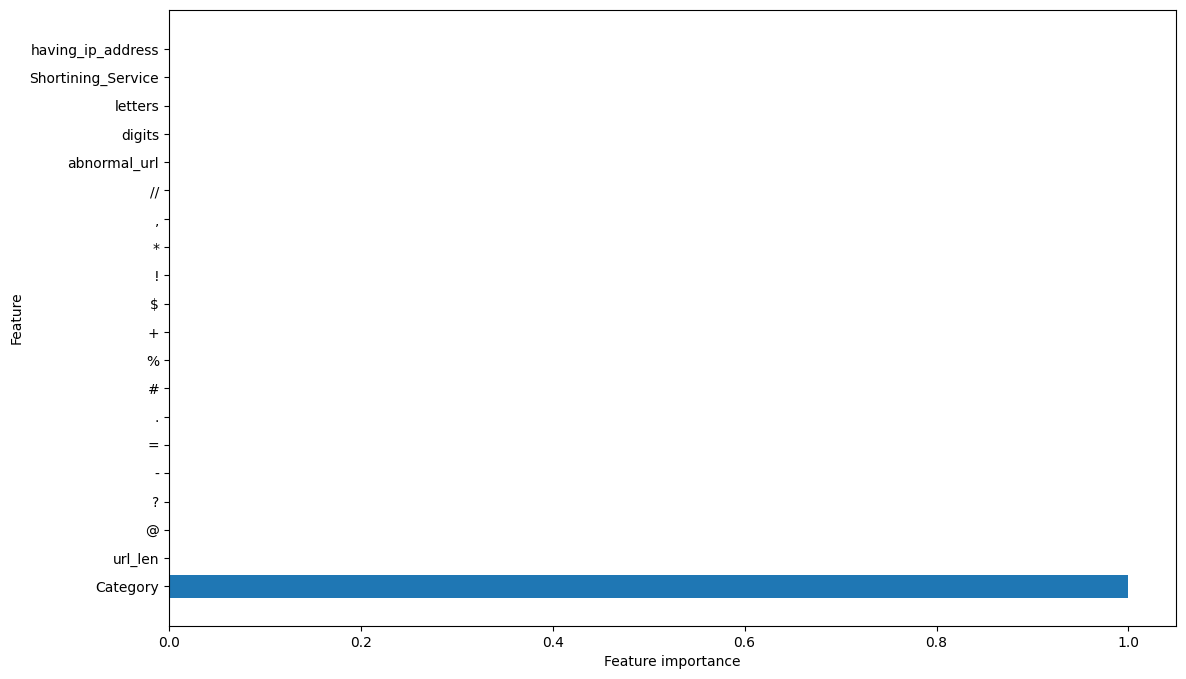

In [29]:
feature_names = x.columns.tolist()

#checking the feature improtance in the model
plt.figure(figsize=(13,8))
n_features = x_train.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [30]:
pred_test=model.predict(x_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Benign")
        elif array[i] == 1:
            print("Defacement")
        elif array[i] == 2:
            print("Phishing")
        elif array[i] == 3:
            print("Malware")

print('Predicted :  ')
view_result(pred_test[0:50])
print()

print('Actual : ',end='\n')
view_result(pred_test[0:50])


Predicted :  
Benign
Defacement
Benign
Benign
Benign
Benign
Benign
Defacement
Benign
Benign
Benign
Benign
Benign
Defacement
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Defacement
Defacement
Benign
Defacement
Benign
Defacement
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Defacement
Benign
Defacement
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Benign

Actual : 
Benign
Defacement
Benign
Benign
Benign
Benign
Benign
Defacement
Benign
Benign
Benign
Benign
Benign
Defacement
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Defacement
Defacement
Benign
Defacement
Benign
Defacement
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Defacement
Benign
Defacement
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Benign
Benign


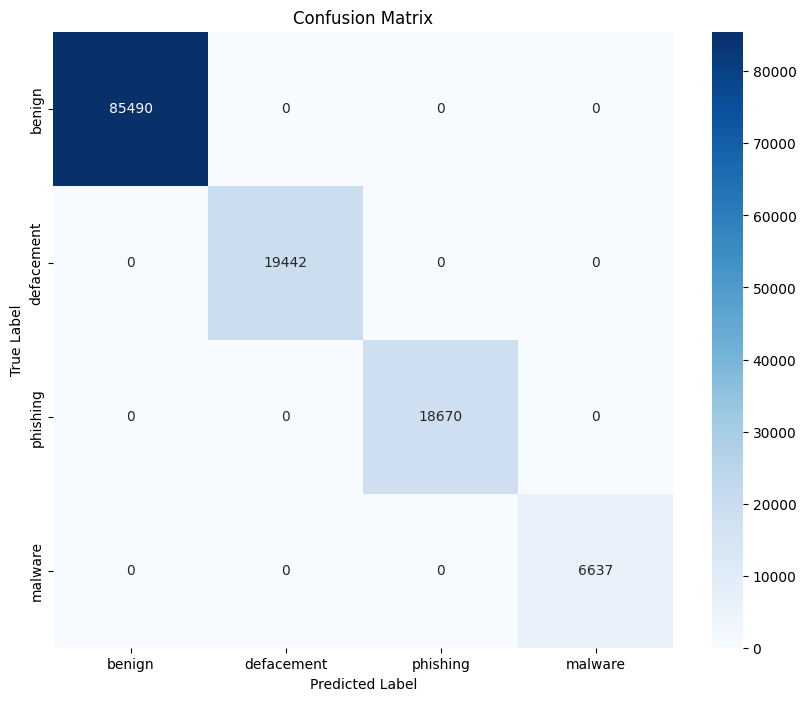


Checking first 5 predictions:
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 3, Predicted: 3

Overall Model Performance:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000


In [73]:
# # 1. Confusion Matrix Visualization

# cm = confusion_matrix(y_test, y_pred_test)
# plt.figure(figsize=(10,8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=["benign", "defacement", "phishing", "malware"],
#             yticklabels=["benign", "defacement", "phishing", "malware"])
# plt.title('Confusion Matrix')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.show()

# # 2. Individual Predictions Check
# def check_url_type(url_features):
#     prediction = model.predict([url_features])
#     types = {0: "benign", 1: "defacement", 2: "phishing", 3: "malware"}
#     return types[prediction[0]]

# # Example: Check first 5 predictions vs actual values
# print("\nChecking first 5 predictions:")
# for i in range(5):
#     print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred_test[i]}")

# # 3. Model Performance Metrics
# from sklearn.metrics import precision_recall_fscore_support

# precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')

# print("\nOverall Model Performance:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")
# print(f"Precision: {precision:.3f}")
# print(f"Recall: {recall:.3f}")
# print(f"F1 Score: {f1:.3f}")

In [74]:
# # 4. Cross Validation
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model, x, y, cv=5)
# print("\nCross Validation Scores:")
# print(f"CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


Cross Validation Scores:
CV Accuracy: 1.000 (+/- 0.000)
